In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json
from sklearn.linear_model import LinearRegression
from collections import Counter
from random import randint


sns.set()

In [ ]:
from wordcloud import WordCloud

In [5]:
movies_dataset_produccion = pd.read_csv(r'C:\Users\User\Documents\Henry\DataScience\Proyecto_Individual_1\Datasets\movies_dataset_produccion.csv', low_memory=False)

In [6]:
df = pd.DataFrame(movies_dataset_produccion)

In [7]:
df.head()

,adult,id,overview,popularity,title,vote_average,vote_count,release_year,release_month,genre,country,principal_cast,director
0,False,55475,Balbuena is a genial illegal immigrant who mak...,0.291021,Nueba Yol,5.5,1.0,1995,Agosto,Comedy,Dominican Republic,NaN,Ángel Muñiz
1,False,18183,"Tita is passionately in love with Pedro, but h...",4.126083,Like Water for Chocolate,6.6,70.0,1992,Abril,Drama,Mexico,NaN,NaN
2,False,12527,"Havana, Cuba, 1979. Flamboyantly gay artist Di...",1.777197,Strawberry and Chocolate,7.1,16.0,1993,Enero,Comedy,Cuba,NaN,NaN
3,False,8223,"Kika, a young cosmetologist, is called to the ...",3.647321,Kika,6.8,58.0,1993,Octubre,Comedy,France,NaN,NaN
4,False,4307,"Marisa Paredes is Leocadia (""Leo"") Macias, a w...",2.286788,The Flower of My Secret,6.9,43.0,1995,Septiembre,Drama,Spain,Marisa Paredes,NaN


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 991 entries, 0 to 990
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   adult           991 non-null    bool   
 1   id              991 non-null    int64  
 2   overview        923 non-null    object 
 3   popularity      991 non-null    float64
 4   title           991 non-null    object 
 5   vote_average    991 non-null    float64
 6   vote_count      991 non-null    float64
 7   release_year    991 non-null    int64  
 8   release_month   991 non-null    object 
 9   genre           927 non-null    object 
 10  country         917 non-null    object 
 11  principal_cast  103 non-null    object 
 12  director        95 non-null     object 
dtypes: bool(1), float64(3), int64(2), object(7)
memory usage: 94.0+ KB


In [ ]:
# Filtro las filas donde la columna 'genre' tiene valores nulos
filas_nulas_genre = df[df['genre'].isnull()]

# Veo las filas con valores nulos en la columna 'genre'
filas_nulas_genre.head(20)

,adult,id,overview,popularity,title,vote_average,vote_count,release_year,release_month,genre,country,principal_cast,director
19,False,42020,"In a Gypsy village, the fathers of Candela and...",0.185772,El Amor Brujo,7.0,4.0,1986,Marzo,NaN,Spain,NaN,NaN
53,False,81346,NaN,0.286929,To Begin Again,6.3,8.0,1982,Marzo,NaN,Spain,NaN,José Luis Garci
65,False,278813,The true story of the rise of a Japanese busin...,0.002353,Esmeraldero,0.0,0.0,2003,Noviembre,NaN,NaN,NaN,NaN
71,False,83505,Zapa is a locksmith in a quiet and little town...,0.695413,El Bonaerense,7.2,10.0,2002,Septiembre,NaN,Argentina,NaN,NaN
85,False,147169,Harry and his much-younger girlfriend surprise...,0.002801,Under the Lighthouse Dancing,0.0,0.0,1997,Octubre,NaN,NaN,NaN,NaN
154,False,155386,NaN,0.298019,La Sierra,7.5,4.0,2005,Enero,NaN,Colombia,NaN,NaN
161,False,244145,An architect (Daniel Hendler) trails a man (Gu...,0.302424,The Bottom of the Sea,6.7,6.0,2003,Agosto,NaN,NaN,NaN,Damián Szifrón
176,False,417285,A group of young people makes a plan to escape...,0.001678,Los signos del zodiaco,0.0,0.0,1964,Febrero,NaN,NaN,NaN,NaN
177,False,91099,"A Sunday, three young friends read the obituar...",0.324601,Your life in 65 minutes,6.5,4.0,2006,Julio,NaN,NaN,NaN,NaN
193,False,63615,NaN,0.004763,Un buen hombre,0.0,0.0,2009,Abril,NaN,Spain,NaN,NaN


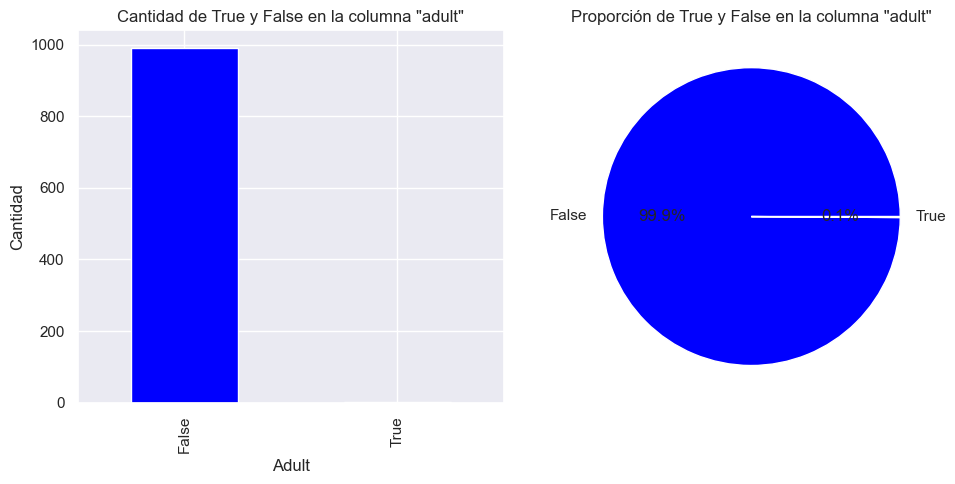

In [11]:
# Exploro la variable "adult" para ver su relevancia

# Cuento las ocurrencias de cada valor en la columna 'adult'
conteo_adult = df['adult'].value_counts()

# Creo la figura y los subplots
plt.figure(figsize=(10, 5))

# Gráfico de barras para las cantidades
plt.subplot(1, 2, 1)
conteo_adult.plot(kind='bar', color=['blue', 'orange'])
plt.title('Cantidad de True y False en la columna "adult"')
plt.xlabel('Adult')
plt.ylabel('Cantidad')

# Gráfico de pastel para las proporciones
plt.subplot(1, 2, 2)
conteo_adult.plot(kind='pie', autopct='%1.1f%%', colors=['blue', 'orange'])
plt.title('Proporción de True y False en la columna "adult"')
plt.ylabel('')

# Muestro los gráficos
plt.tight_layout()
plt.show()

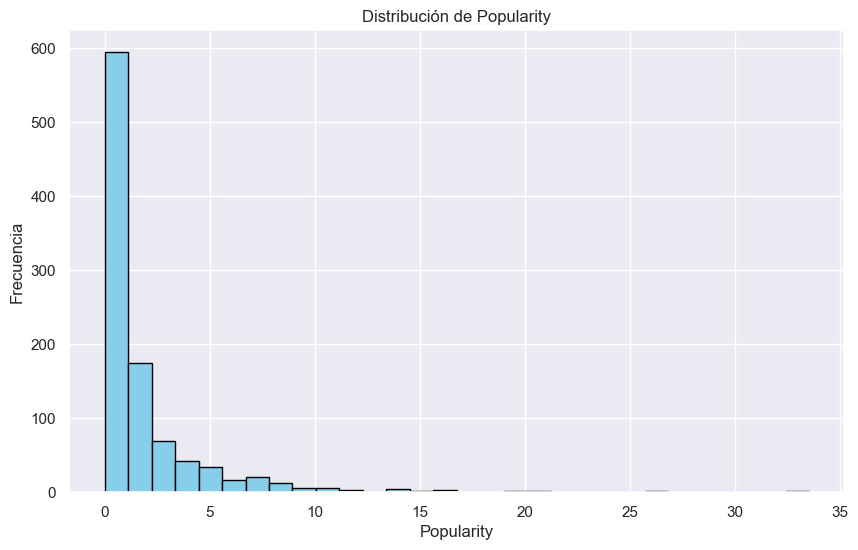

In [12]:
# Exploro la variable "popularity" en busca de outliers o patrones

# Grafico la distribución de la columna 'popularity'
plt.figure(figsize=(10, 6))
df['popularity'].plot(kind='hist', bins=30, color='skyblue', edgecolor='black')
plt.title('Distribución de Popularity')
plt.xlabel('Popularity')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()

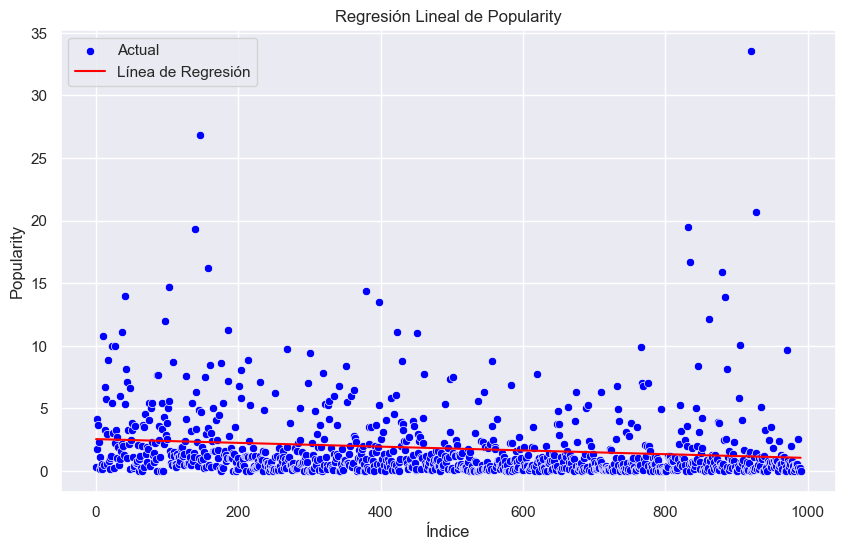

In [14]:
# Hago una regresión lineal para ver la distribución de las pelis en base a la columna "popularity"

# Preparo los datos para la regresión lineal
X = df.index.values.reshape(-1, 1)  # Uso el índice como la variable independiente
y = df['popularity'].values.reshape(-1, 1)  # Uso 'popularity' como la variable dependiente

# Creo y ajusto el modelo de regresión lineal
modelo = LinearRegression()
modelo.fit(X, y)

# Predigo los valores
y_pred = modelo.predict(X)

# Grafico los datos y la línea de regresión
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df.index, y=df['popularity'], color='blue', label='Actual')
plt.plot(df.index, y_pred, color='red', label='Línea de Regresión')
plt.title('Regresión Lineal de Popularity')
plt.xlabel('Índice')
plt.ylabel('Popularity')
plt.legend()
plt.grid(True)
plt.show()

In [20]:
# Expoloro la relación entre las variables "popularity" y "vote average"

# Selecciono las columnas "title", "popularity" y "vote_average"
columnas_seleccionadas = df[['title', 'popularity', 'vote_average','vote_count',]]

# Ordeno el dataframe por "popularity" en orden descendente
df_ordenado = columnas_seleccionadas.sort_values(by='vote_average', ascending=False)

# Veo el dataframe ordenado
df_ordenado

,title,popularity,vote_average,vote_count
739,God is on Air,0.167703,10.0,1.0
593,Butterfly,0.352360,10.0,3.0
979,The Human Surge,0.484825,10.0,1.0
416,Looking for Maria Sanchez,0.122935,10.0,1.0
611,Magallanes,0.398179,9.0,1.0
...,...,...,...,...
922,Cárcel de Mujeres,0.063012,0.0,0.0
921,Santo en Anónimo mortal,0.000136,0.0,0.0
234,Nömadak Tx,0.003637,0.0,0.0
243,Less Is More,0.001636,0.0,0.0


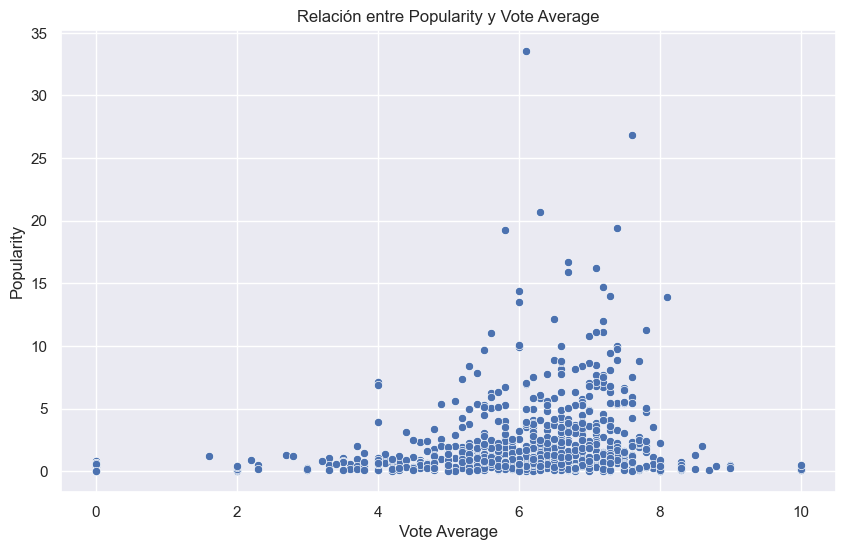

La correlación entre Popularity y Vote Average es: 0.2281699182749465


In [18]:

# Grafico la relación entre 'popularity' y 'vote_average'
plt.figure(figsize=(10, 6))
sns.scatterplot(x='vote_average', y='popularity', data=df)
plt.title('Relación entre Popularity y Vote Average')
plt.xlabel('Vote Average')
plt.ylabel('Popularity')
plt.grid(True)
plt.show()

# Calculo la correlación entre 'popularity' y 'vote_average'
correlacion = df['popularity'].corr(df['vote_average'])
print(f"La correlación entre Popularity y Vote Average es: {correlacion}")

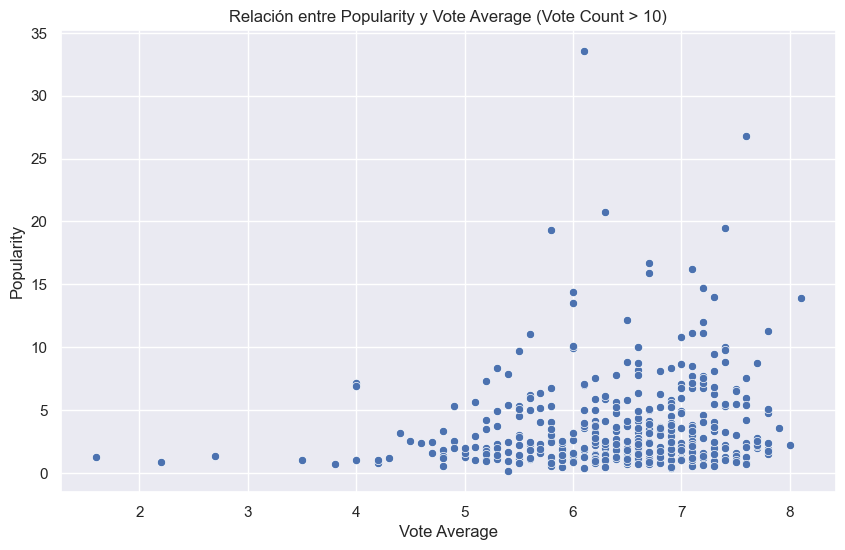

La correlación entre Popularity y Vote Average (Vote Count > 10) es: 0.1612881425732469


In [21]:
# Para eliminar outliers y anomalías, filtro el dataset para incluir solo películas con vote_count > 10
df_filtrado = df[df['vote_count'] > 10]

# Grafico la relación entre 'popularity' y 'vote_average' para los datos filtrados
plt.figure(figsize=(10, 6))
sns.scatterplot(x='vote_average', y='popularity', data=df_filtrado)
plt.title('Relación entre Popularity y Vote Average (Vote Count > 10)')
plt.xlabel('Vote Average')
plt.ylabel('Popularity')
plt.grid(True)
plt.show()

# Calculo la correlación entre 'popularity' y 'vote_average' para los datos filtrados
correlacion = df_filtrado['popularity'].corr(df_filtrado['vote_average'])
print(f"La correlación entre Popularity y Vote Average (Vote Count > 10) es: {correlacion}")


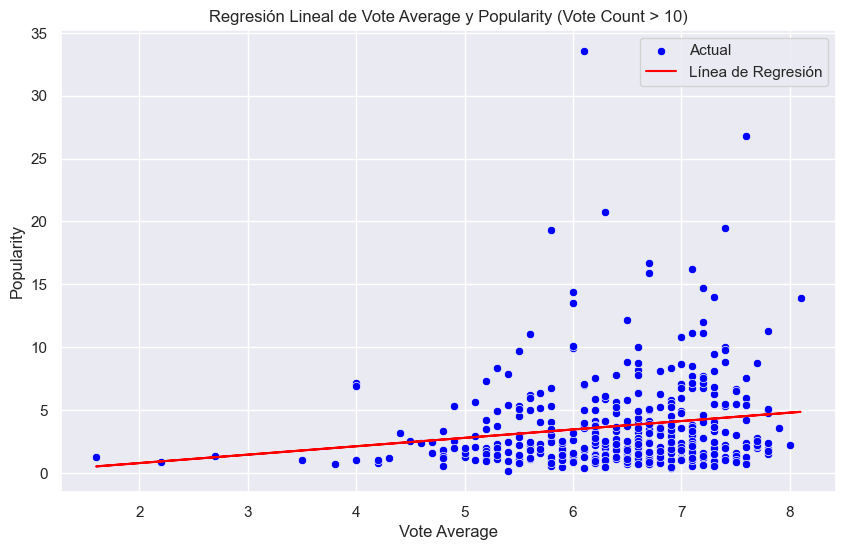

La correlación entre Vote Average y Popularity (Vote Count > 10) es: 0.1612881425732469


In [23]:
# Hago la regresión lineal de nuevo pero con los datos filtrados

# Preparo los datos para la regresión lineal
X = df_filtrado['vote_average'].values.reshape(-1, 1)  # Uso 'vote_average' como la variable independiente
y = df_filtrado['popularity'].values.reshape(-1, 1)  # Uso 'popularity' como la variable dependiente

# Creo y ajusto el modelo de regresión lineal
modelo = LinearRegression()
modelo.fit(X, y)

# Predigo los valores usando el modelo
y_pred = modelo.predict(X)

# Grafico los datos y la línea de regresión
plt.figure(figsize=(10, 6))
sns.scatterplot(x='vote_average', y='popularity', data=df_filtrado, color='blue', label='Actual')
plt.plot(df_filtrado['vote_average'], y_pred, color='red', label='Línea de Regresión')
plt.title('Regresión Lineal de Vote Average y Popularity (Vote Count > 10)')
plt.xlabel('Vote Average')
plt.ylabel('Popularity')
plt.legend()
plt.grid(True)
plt.show()

# Calculo de nuevo la correlación entre 'vote_average' y 'popularity' para los datos filtrados
correlacion = df_filtrado['vote_average'].corr(df_filtrado['popularity'])
print(f"La correlación entre Vote Average y Popularity (Vote Count > 10) es: {correlacion}")

In [40]:
# Nube de palabras

# Combino todos los títulos de películas en una sola cadena de texto
titulos = ' '.join(df['title'].dropna().values)

# Cuento las palabras
palabras = titulos.split()
conteo_palabras = Counter(palabras)

conteo_palabras


Counter({'The': 202,
         'of': 106,
         'the': 87,
         'El': 39,
         'in': 30,
         'and': 27,
         'de': 27,
         'a': 26,
         'La': 21,
         'to': 19,
         'Love': 14,
         'A': 14,
         'Me': 13,
         'for': 11,
         'My': 11,
         'Night': 11,
         'Man': 10,
         'No': 10,
         'I': 9,
         'on': 8,
         'Life': 8,
         'la': 8,
         '&': 8,
         'Your': 7,
         'Dead': 7,
         'You': 7,
         'del': 7,
         'Last': 7,
         '-': 7,
         'Eyes': 6,
         'In': 6,
         'Death': 6,
         'One': 6,
         'Is': 6,
         '7': 6,
         'y': 6,
         'from': 6,
         'We': 6,
         'el': 6,
         'Secret': 5,
         'All': 5,
         'Other': 5,
         'What': 5,
         'Under': 5,
         'Are': 5,
         'Time': 5,
         'Las': 5,
         'Days': 5,
         'Two': 5,
         'Great': 5,
         'Not': 4,
         'Blood':

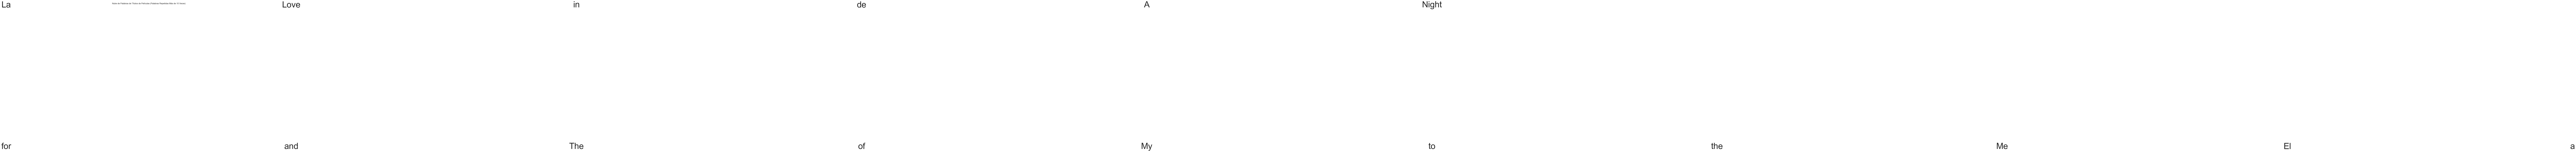

In [51]:
# Filtro las palabras que aparecen más de 10 veces
conteo_filtrado = {palabra: conteo for palabra, conteo in conteo_palabras.items() if conteo > 10}


# Creo la nube de palabras
plt.figure(figsize=(30, 15))
plt.axis('off')

# Añado las palabras más comunes con diferentes tamaños de fuente
for i, (palabra, conteo) in enumerate(conteo_filtrado.items()):
    plt.text(i % 10, i // 10, palabra, fontsize=min(conteo*5, 50), ha='center', va='center', alpha=1.0)

plt.title('Nube de Palabras de Títulos de Películas (Palabras Repetidas Más de 10 Veces)')
plt.show()

# Había obtenido una nube pero con todas las palabras superpuestas y no se entendía nada. Fui modificando tamaño y otras cosas
# pero no logré tener una buena representación de la nube